# Homework #2 - Support Vector Machines

(This skeleton file is provided for HW#1 only.  You are expected to modify it for use in this and other homeworks for the course.)    

This is the README section for A0000000X's submission.
(For group submissions [when applicable], simply concatenate the student matric numbers in lexicographical order separated by a '-' (dash); e.g., A0000000X-A0000001Y)

### Files included with this submission
hw1-1.ipynb

problem-1a.txt

problem-2d.txt



## Programming Exercise 1

In [1]:
from io import StringIO
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
from sklearn import svm
from sklearn.datasets import load_svmlight_file
%matplotlib inline
# Plotting with style! 
import seaborn as sb 

# Size the plot appropriately for online display
pl.rcParams['figure.figsize'] = (12.0, 10.0)

Let's fix the random number generator first, in case we need results that are replicable.

In [2]:
nr.seed(3244)

In [3]:
def fetchData(fileName):
    f = open(fileName, "r")
    content = np.loadtxt(StringIO(f.read()))
    data = content[:, 1:]
    label = content[:, 0]
    f.close()
    return data, label


In [4]:
# Question 1A
def svmTrain(dataTrain, labelTrain, cost, kernel, gamma, degree, coef0):
    svm1A = svm.SVC(kernel=kernel, gamma=gamma, degree=degree, C=cost, coef0=coef0)
    svm1A.fit(dataTrain, labelTrain)
    return svm1A, len(svm1A.support_vectors_)
    
def svmPredict(data, label, svmModel):
    misclassified_points = 0
    for i in range(len(data)):
        if(label[i] != svmModel.predict(data[i].reshape(1, -1))):
            misclassified_points += 1
    return 1.0 - misclassified_points / len(data)

In [5]:
### The output of your program should be written in a file as follows.
#   for question 'i', write the output in 'problem-i.txt' file (e.g., 'problem-1a.txt')
fo = open('problem-1a.txt', 'w')
        
dataTrain, labelTrain = fetchData('hw2-1-train.txt')
dataTest, labelTest = fetchData('hw2-1-test.txt')
cost = 1
gamma = 'auto'
degree = 3
kernel = 'linear'
coef0 = 0.0

svmModel, totalSV  = svmTrain(dataTrain, labelTrain, cost, kernel, gamma, degree, coef0)

# test on the training data
trainAccuracy = svmPredict(dataTrain, labelTrain, svmModel)

# test on your test data
testAccuracy = svmPredict(dataTest, labelTest, svmModel)

# report your results in the file
fo.write("Kernel: "+ str(kernel)+"\n")
fo.write("Cost: "+ str(cost)+ "\n")
fo.write("Number of Support Vectors: "+ str(totalSV)+"\n")
fo.write("Train Accuracy: "+ str(trainAccuracy)+"\n")
fo.write("Test Accuracy: " + str(testAccuracy)+"\n")
fo.close()

In [6]:
#Q1a
print("Q1a")
subset = [50, 100, 200, 800]
cost = 1.0
gamma = 'auto'
kernel = 'linear'
coef0 = 0.0

for i in range(len(subset)):
    subDataTrain = dataTrain[:subset[i]]
    subLabelTrain = labelTrain[:subset[i]]
    svmModel, totalSV = svmTrain(subDataTrain, subLabelTrain, cost, kernel, gamma, degree, coef0)

    # test on your test data
    testAccuracy = svmPredict(dataTest, labelTest, svmModel)
    print("Subset size " + str(subset[i]) + "\n")
    print(" Support vectors counts: " + str(totalSV) + ", test accuracy " + str(testAccuracy) + "\n")

Q1a
Subset size 50

 Support vectors counts: 2, test accuracy 0.9716981132075472

Subset size 100

 Support vectors counts: 4, test accuracy 0.9787735849056604

Subset size 200

 Support vectors counts: 4, test accuracy 0.9811320754716981

Subset size 800

 Support vectors counts: 10, test accuracy 0.9787735849056604



In [7]:
#Q1B
print("Q1b")
C = [0.0001, 0.001, 0.01, 1]
Q = [2, 5]
kernel = "poly"
gamma = 1.0
coef0 = 1.0

for i in range(len(C)):
    for j in range(len(Q)):
        cost = C[i]
        degree = Q[j]
        svmModel, totalSV = svmTrain(dataTrain, labelTrain, cost, kernel, gamma, degree, coef0)
        
        # test on the training data
        trainAccuracy = svmPredict(dataTrain, labelTrain, svmModel)

        # test on your test data
        testAccuracy = svmPredict(dataTest, labelTest, svmModel)
        
        print("Cost is: " + str(cost) + ", degree: " + str(degree) +"\n")
        print("  Ein " + str((1 - trainAccuracy)) + "\n")
        print("  Eout "+ str(1 - testAccuracy) + "\n")
        print("  Count support vector: " + str(totalSV) + "\n")
        
print("When C = 0.0001, Ein is higher at Q = 5.: FALSE")
print("When C = 0.001, the number of support vectors is lower at Q = 5.: TRUE")
print("When C = 0.01, Ein is higher at Q = 5.: FALSE")
print("When C = 1, Eout is lower at Q = 5.: FALSE")        

Q1b
Cost is: 0.0001, degree: 2

  Ein 0.008968609865470878

  Eout 0.01650943396226412

  Count support vector: 236

Cost is: 0.0001, degree: 5

  Ein 0.004484304932735439

  Eout 0.018867924528301883

  Count support vector: 26

Cost is: 0.001, degree: 2

  Ein 0.004484304932735439

  Eout 0.01650943396226412

  Count support vector: 76

Cost is: 0.001, degree: 5

  Ein 0.004484304932735439

  Eout 0.021226415094339646

  Count support vector: 25

Cost is: 0.01, degree: 2

  Ein 0.004484304932735439

  Eout 0.018867924528301883

  Count support vector: 34

Cost is: 0.01, degree: 5

  Ein 0.0038436899423446302

  Eout 0.021226415094339646

  Count support vector: 23

Cost is: 1, degree: 2

  Ein 0.0032030749519538215

  Eout 0.018867924528301883

  Count support vector: 24

Cost is: 1, degree: 5

  Ein 0.0032030749519538215

  Eout 0.021226415094339646

  Count support vector: 21

When C = 0.0001, Ein is higher at Q = 5.: FALSE
When C = 0.001, the number of support vectors is lower at 

In [8]:
#Q1c

C = [0.01, 1, 100, 10000, 1000000]
kernel = "rbf"
degree = 1.0
gamma = 1.0
coef0 = 0.0

for i in range(len(C)):
    cost = C[i]
    svmModel, totalSV = svmTrain(dataTrain, labelTrain, cost, kernel, gamma, degree, coef0)
        
    # test on the training data
    trainAccuracy = svmPredict(dataTrain, labelTrain, svmModel)

    # test on your test data
    testAccuracy = svmPredict(dataTest, labelTest, svmModel)
        
    print("Cost is: " + str(cost) + "\n")
    print(" Ein " + str((1 - trainAccuracy)) + "\n")
    print(" Eout "+ str(1 - testAccuracy)+ "\n")
    print(" Count support vector: " + str(totalSV)+ "\n")
    
print("Ein is lowest when cost = 10^6")
print("Eout is lowest when cost = 100")

Cost is: 0.01

 Ein 0.0038436899423446302

 Eout 0.02358490566037741

 Count support vector: 406

Cost is: 1

 Ein 0.004484304932735439

 Eout 0.021226415094339646

 Count support vector: 31

Cost is: 100

 Ein 0.0032030749519538215

 Eout 0.018867924528301883

 Count support vector: 22

Cost is: 10000

 Ein 0.002562459961563124

 Eout 0.02358490566037741

 Count support vector: 19

Cost is: 1000000

 Ein 0.0006406149903908087

 Eout 0.02358490566037741

 Count support vector: 17

Ein is lowest when cost = 10^6
Eout is lowest when cost = 100


## PROGRAMMING QUESTION 2


In [9]:
#Question 2D
fo2 = open('problem-2d.txt', 'w')

dataTrain, labelTrain = load_svmlight_file('hw2-2-train.txt')
dataTrain = dataTrain.toarray()

dataTest, labelTest = load_svmlight_file('hw2-2-test.txt')
dataTest = dataTest.toarray()

cost = 1.0
gamma = 'auto'
degree = 3
kernel = 'linear'
coef0 = 0.0

# train your svm
# (n.b., svmTrain, svmPredict are not previously defined;
# you will have to supply code to implement them)
svmModel, totalSV  = svmTrain(dataTrain, labelTrain, cost, kernel, gamma, degree, coef0)

# test on the training data
trainAccuracy = svmPredict(dataTrain, labelTrain, svmModel)

# test on your test data
testAccuracy = svmPredict(dataTest, labelTest, svmModel)

# report your results in the file
fo2.write("Kernel: "+ str(kernel)+"\n")
fo2.write("Cost: "+ str(cost)+ "\n")
fo2.write("Number of Support Vectors: "+ str(totalSV)+"\n")
fo2.write("Train Accuracy: "+ str(trainAccuracy)+"\n")
fo2.write("Test Accuracy: " + str(testAccuracy)+"\n")
fo2.close()

In [10]:
#Question e(RBF)

kernel = "rbf"
gamma = 0.001
coef0 = 0.0
degree = 3
cost = 1.0

svmModel, totalSV = svmTrain(dataTrain, labelTrain, cost, kernel, gamma, degree, coef0)
        
# test on the training data
trainAccuracy = svmPredict(dataTrain, labelTrain, svmModel)

# test on your test data
testAccuracy = svmPredict(dataTest, labelTest, svmModel)

print("Kernel is: " + kernel +"\n")        
print("Cost is: " + str(cost) + ", degree: " + str(degree) + "\n")
print("Ein " + str((1 - trainAccuracy)) + "\n")
print("Eout "+ str(1 - testAccuracy)+ "\n")
print("Count support vector: " + str(totalSV)+ "\n")

Kernel is: rbf

Cost is: 1.0, degree: 3

Ein 0.0011666666666666492

Eout 0.020000000000000018

Count support vector: 2594



In [11]:
#Question e(poly)

kernel = "poly"
gamma = 1.0
degree = 2
coef0 = 1.0
cost = 1.0

svmModel, totalSV = svmTrain(dataTrain, labelTrain, cost, kernel, gamma, degree, coef0)
        
# test on the training data
trainAccuracy = svmPredict(dataTrain, labelTrain, svmModel)

# test on your test data
testAccuracy = svmPredict(dataTest, labelTest, svmModel)
        
print("Kernel is: " + kernel+"\n")         
print("Cost is: " + str(cost) + ", degree: " + str(degree)+"\n")
print("Ein " + str((1 - trainAccuracy))+"\n")
print("Eout "+ str(1 - testAccuracy)+"\n")
print("Count support vector: " + str(totalSV)+"\n")

print("CONCLUSION: THE LINEAR KERNEL GIVES THE LOWEST Ein")

Kernel is: poly

Cost is: 1.0, degree: 2

Ein 0.0

Eout 0.020000000000000018

Count support vector: 1295

CONCLUSION: THE POLY KERNEL GIVES THE LOWEST Ein


## Essay Questions

_You may choose to do the essay questions here in the .ipynb notebook, but you are welcomed to use a word processor instead and write your solutions there instead (and convert it into .pdf format).  If you do that, please ensure to delete this section._

QUESTION 1/

Notice that $ k^{\frac{y_{n} + 1}{2}} $ is k if $ y_{n} $ = 1 and is 1 if $ y_{n} $ = -1

Minimize $\frac{1}{2}{w}^{T}{w} + C \sum_{n=1}^{N}k^{\frac{y_{n} + 1}{2}}e _{n}$ 
		
With constraint that $y_{n}({w}^{T}{x} + b) >= 1 - e_{n}$ and $e_{n} >= 0$ for n = 1,2,...,N,

Now, we need to maximise $ \mathcal{L}(\mathbf{a}) = \sum_{n=1}^{N} a_{n} - \frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}y_{n}y_{m} a_{n} a_{m}\mathbf{x}_{n}^{T}\mathbf{x}_{m}$

subject to $0 <= a_{n} <= C k^{\frac{y_{n} + 1}{2}}$ and $\sum_{n=1}^{N}a_{n}y_{n} = 0$ 

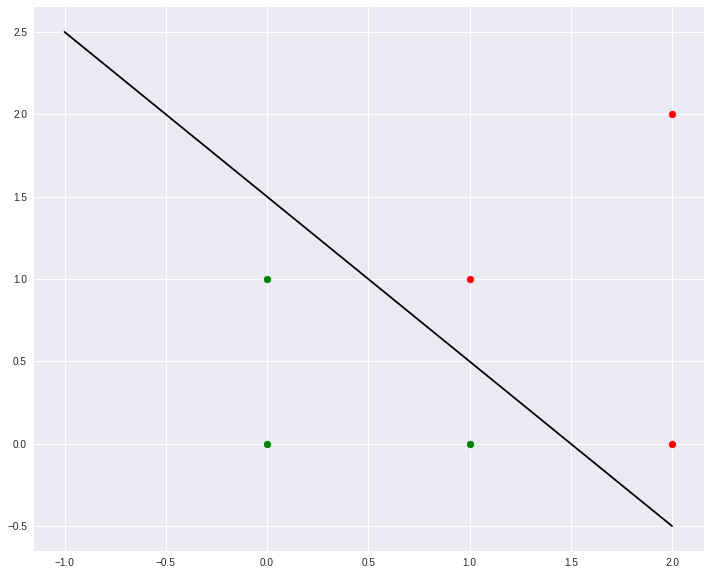

In [12]:
# QUESTION 2
X = np.array([[1, 1], [2, 2],[2, 0],[0, 1], [1, 0], [0, 0]])

Y = np.array([1, 1, 1, -1, -1, -1])

for i in range(len(Y)):
    if Y[i] > 0:
        pl.scatter(X[i, 0], X[i, 1], c='r')
    else:
        pl.scatter(X[i, 0], X[i, 1], c='g')

x = np.linspace(-1,2)
pl.plot(x,  - x + 1.5, 'k')
pl.show()

a/ Yes, the dataset is linearly seperable.

b/ 

By inspection, we have: 

The equation of the maximum margin hyper-plane is: $\mathbf{x1} + \mathbf{x2} = 1.5 $, and its corresponding weight vector is $ (1, 1) ^ T $
   
The support vectors are : (1, 0), (0, 1), (1, 1), (0, 2).

c/ If we remove a single support vector, then the size of the optimal margin either stays the same or increases.

Explain: let the removed vector be A, and the point set without A is called S'.

Now, let supposed the previous optimal margin was K. Now let re-use the hyperplane that provides optimal margin for (S' + A), then note that previously we have at least TWO support vectors, so after removing one of them, the margin for S' using that hyperplane would still remain the same. Note that this hyperplane may not provide optimal margin, so the optimal margin for S' would be larger than or equal to the old margin of (S' + A).

For this particular dataset, if we remove either (1, 0) or (1, 1), the optimal margin increases from sqrt(2)/4 to 0.5.
However, if we remove either (0, 1) or (2, 0) then the optimal margin remains the same.

d/ Using the same logic as explained in c, for a general dataset, if we remove a single support vector then the size of optimal margin also stays the same or increases.

QUESTION 3/
1/ IF C >= 0, then using property 3 as shown in question 2 in tutorial 4: " q[K < $ \mathbf {x} , \mathbf {x'}$ >] is a valid kernel, given that q[.] is a polynomial function with non-negative coefficients", we use q(y) = cy, then q[< $ \mathbf {x} , \mathbf {x'}$ >] = c< $ \mathbf {x} , \mathbf {x'}$ >
= K($ \mathbf {x} , \mathbf {x'}$) is a valid kernel (1)

*However, IF C < 0, then let t = -c, then K($ \mathbf {x} , \mathbf {x'}$) = $ -t< \mathbf {x} , \mathbf {x'}> $ = -K1($ \mathbf {x} , \mathbf {x'}$) [where K1($ \mathbf {x} , \mathbf {x'}$) is a valid kernel based on (1)]. Let M be Gram Matrix for K1($ \mathbf {x} , \mathbf {x'}$), then -M will be Gram Matrix for K($ \mathbf {x} , \mathbf {x'}$). For every non-zero column vector z of n real numbers, $z^T M z $ >= 0, then $z^T (-M) z$ <=0 => Gram Matrix of K($ \mathbf {x} , \mathbf {x'}$) will be negative-semi definite => K($ \mathbf {x} , \mathbf {x'}$) is not a valid kernel

2/ According to property 6.14 from textbook "Pattern Recognition and Machine Learning" of Christopher, k1($ \mathbf {x} , \mathbf {x'}$) = f(x)k2($ \mathbf {x} , \mathbf {x'}$)f(x') is a valid kernel (f, f' are functions, k1(x, x') is a valid kernel).

Let f(x) = $ e  ^ {-|x| ^ 2} $

Let f(x') = $ e  ^ {-|x'| ^ 2} $

k2($ \mathbf {x} , \mathbf {x'}$) = $ < x, x' > ^ 0 $ which is a valid kernel according to property 3.

So k1(x, x') = $ e  ^ {-|x| ^ 2}  e  ^ {-|x'| ^ 2} $ is a valid kernel.

Also, k3(x, x') = $ < x, x' > ^ 2 $ is also a valid kernel according to property 3 in tutorial( it is a polynomial 

function of degree 2).

We have: K($ \mathbf {x} , \mathbf {x'}$) = k1($ \mathbf {x} , \mathbf {x'}$) + k3($ \mathbf {x} , \mathbf {x'}$) 

=> K($ \mathbf {x} , \mathbf {x'}$) is a valid kernel according to property 1.


## Statement of Individual Work

Please initial (between the square brackets) one of the following statements.

[X] I, A0161308M, certify that I have followed the CS 3244 Machine Learning class guidelines for homework assignments.  In particular, I expressly vow that I have followed the Facebook rule in discussing with others in doing the assignment and did not take notes (digital or printed) from the discussions.  

[ ] I, <*substitute your matric number here*>, did not follow the class rules regarding the homework assignment, because of the following reason:

<*Please fill in*>

I suggest that I should be graded as follows:

<*Please fill in*>

### References

I have refered to the following list of people and websites in preparing my homework submission:

- Online resources for Python and Scikit-learn API.
- People I discussed with: Huynh Thanh Duc Anh
- Pattern Recognition and Machine Learning textbook